We'll demonstrate a few common tricks with shaded plots.

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

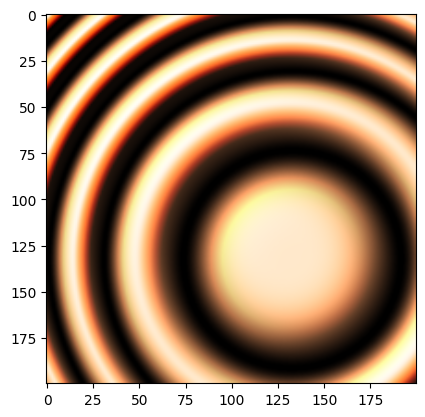

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import LightSource, Normalize



def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')


display_colorbar()

avoid_outliers()

shade_other_data()


plt.show()